In [1]:
# the code compatible with Python 2.7
import pandas as pd
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt
import scipy.io as sio
from __future__ import division
import math

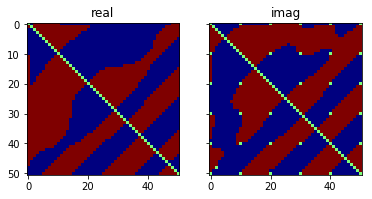

In [2]:
'''
    load and plot the binary benchmark cumulant maps:
'''
maps = sio.loadmat('binary_maps.mat')
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(maps['real_map'], cmap='jet')
ax1.set_title('real')
ax2.imshow(maps['imag_map'], cmap='jet')
ax2.set_title('imag')
plt.show()

In [3]:
'''
    define cumulant:
'''

def cumulant(x, y, k, l): 
    '''Compute cumulant of orders (k,l) on paired signals (x,y) 
    x, y should be given as a (N x 1) or (1 x N) numpy ndarray 
    k, l should be given as rational numbers, either integers or floats
    ''' 
    
    if type(x) != np.ndarray or type(y) != np.ndarray: 
        return 'data of a wrong type: time series (x, y) should be given as a (N x 1) or (1 x N) numpy ndarray' 
    if x.shape != y.shape: 
        return 'time series (x, y) do not match in size!' 
    if x.ndim != 2 or y.ndim != 2: 
        return 'time series (x, y) of wrong dimensions; should be (N x 1) or (1 x N) numpy ndarray' 

    N = np.max([x.shape[0], x.shape[1]])
    cumm = 0
    for ind in range(N):
        cumm += (1/N)*(complex(x[ind])**float(k))*(complex(y[ind])**float(l)) - \
        (complex(y[ind])**float(k))*(complex(x[ind])**float(l))
    return [float(np.real(cumm)), float(np.imag(cumm))]

In [4]:
'''
    define the discount function for for weighting cumulants:
'''
def flc(c):
    return math.log(math.cosh(np.max([c,0])))

In [5]:
''' specify the range for cumulant orders for the classification
    (the range was chosen as explained in the manuscript, 
    chapter 'Supervised learning using synthetic benchmark datasets')
        delta: interval which must fit the benchmark maps derived for this particular problem (see above)
'''
delta      = maps['delta']
range_real = [0.1, 2.1] 
range_imag = [0.1, 3.7]

Nk         = int(np.floor((range_real[1] - range_real[0])/delta)) + 1
Nl         = int(np.floor((range_imag[1] - range_imag[0])/delta)) + 1
k_range    = range_real[0] + delta*np.arange(Nk)
l_range    = range_imag[0] + delta*np.arange(Nl)

In [6]:
# define the classifier:
def classify(x, y, k, l, Nk, Nl):
    outcome = 0.0
    for ind0 in range(Nk):
        for ind1 in range(Nl):
            outcome += maps['real_map'][ind0,ind1]*flc(cumulant(x,y,k_range[ind0],l_range[ind1])[0]) + \
                 maps['imag_map'][ind0,ind1]*flc(cumulant(x,y,k_range[ind0],l_range[ind1])[1])
    return float(outcome)